In [1]:
# Load all libraries

import xarray as xr
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import gridspec
import matplotlib
import xesmf as xe
from scipy import stats
import cartopy

# B Compset

In [2]:
TS_B = xr.open_dataarray('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_TS_piControl.nc')
TS_B.load()

TREFHT_B = xr.open_dataarray('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_TREFHT_piControl.nc')
TREFHT_B.load()

OMEGA_B = xr.open_dataarray('/data/keeling/a/mailes2/a/lens_processed/CESM_LENS_omega500_piControl.nc')
OMEGA_B.load()

<xarray.DataArray 'OMEGA' (lat: 88, lon: 179)>
array([[ 0.01340513,  0.01320695,  0.01297021, ...,  0.01406088,
         0.01390221,  0.0137369 ],
       [ 0.01735752,  0.01745341,  0.01747349, ...,  0.01601475,
         0.0164608 ,  0.01685281],
       [ 0.01202139,  0.01506044,  0.01736867, ...,  0.00996497,
         0.00675799,  0.00684728],
       ...,
       [-0.00488225, -0.00355881, -0.0024294 , ..., -0.00478609,
        -0.00632663, -0.00664843],
       [-0.00278465, -0.0026194 , -0.0024343 , ..., -0.00307728,
        -0.00304576, -0.00299001],
       [-0.00256477, -0.00254047, -0.00251033, ..., -0.00260211,
        -0.00260144, -0.00259468]], dtype=float32)
Coordinates:
    lev      float64 524.7
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

# E Compset

In [3]:
TS_E = xr.open_dataarray('/data/keeling/a/mailes2/a/alt_compset_processed/CESM1_E_TS_piControl.nc')
TS_E.load()

OMEGA_E = xr.open_dataarray('/data/keeling/a/mailes2/a/alt_compset_processed/CESM1_E_OMEGA500_piControl.nc')
OMEGA_E.load()

TREFHT_E = xr.open_dataarray('/data/keeling/a/mailes2/a/alt_compset_processed/CESM1_E_TREFHT_piControl.nc')
TREFHT_E.load()

<xarray.DataArray 'TREFHT' (time: 10812, lat: 88, lon: 179)>
array([[[242.3476237 , 242.30315664, 242.11497396, ..., 242.89559814,
         242.73270976, 242.69081736],
        [243.39521739, 243.03776923, 242.81422806, ..., 244.27845764,
         244.14513228, 243.67652003],
        [245.85178199, 245.45227314, 245.2290451 , ..., 246.80907661,
         246.68067915, 246.61842407],
        ...,
        [241.19496799, 241.3717247 , 241.49136785, ..., 240.10774965,
         240.40223406, 240.7326663 ],
        [238.97625071, 239.08055759, 239.1790034 , ..., 238.64099486,
         238.75482983, 238.81543079],
        [237.75799774, 237.78400752, 237.8091067 , ..., 237.63428543,
         237.66430995, 237.68577922]],

       [[233.70454091, 233.61435852, 233.42116597, ..., 234.36244868,
         234.19257685, 234.09130834],
        [234.18879055, 233.79998652, 233.49860721, ..., 235.56982685,
         235.2732989 , 234.75787786],
        [236.87986077, 236.45397102, 236.09193429, ..., 237.54800298,
         237.50365456, 237.46261063],
...
        [243.47819188, 243.75339745, 244.03622521, ..., 242.2106891 ,
         242.44928521, 242.80646695],
        [241.95928989, 242.14183417, 242.28577084, ..., 241.1452006 ,
         241.39307361, 241.60489705],
        [240.27170568, 240.38288284, 240.5284345 , ..., 239.94891795,
         240.03318812, 240.10736745]],

       [[243.47383097, 243.14301712, 243.32293828, ..., 243.89290131,
         243.91791331, 243.637792  ],
        [244.29343558, 243.82917743, 244.06214269, ..., 245.48950857,
         245.14529461, 244.87459047],
        [246.32997518, 246.03419554, 245.50822194, ..., 247.69836641,
         247.29235543, 247.05014265],
        ...,
        [240.91924825, 241.17533724, 241.41464751, ..., 239.66149521,
         240.00749834, 240.37103527],
        [239.14573652, 239.30169195, 239.43657557, ..., 238.56168052,
         238.71651204, 238.85520121],
        [238.33372564, 238.43005463, 238.53245773, ..., 237.88230779,
         237.99542923, 238.12668065]]])
Coordinates:
  * time     (time) object 0101-02-01 00:00:00 ... 1002-01-01 00:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

# Land Mask

In [4]:
landmask = xr.open_dataarray('/data/keeling/a/mailes2/a/lens_processed/CESM_LANDFRAC.nc')
landmask.load()

<xarray.DataArray 'LANDFRAC' (lat: 88, lon: 179)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

# Variability

In [5]:
TS_B_rolling = TS_B.rolling(time=120, center=True).mean('time')
TS_B_var = TS_B_rolling.std('time')
TS_B_mask = TS_B_var.where(landmask<0.5).sel(lat=slice(-60,60))

TREFHT_B_rolling = TREFHT_B.rolling(time=120, center=True).mean('time')
TREFHT_B_var = TREFHT_B_rolling.std('time').sel(lat=slice(-60,60))

TS_E_rolling = TS_E.rolling(time=120, center=True).mean('time')
TS_E_var = TS_E_rolling.std('time')
TS_E_mask = TS_E_var.where(landmask<0.5).sel(lat=slice(-60,60))

TREFHT_E_rolling = TREFHT_E.rolling(time=120, center=True).mean('time')
TREFHT_E_var = TREFHT_E_rolling.std('time').sel(lat=slice(-60,60))

OMEGA_B_mask = OMEGA_B.where(landmask<0.5).sel(lat=slice(-60,60))
OMEGA_B_TREFHT = OMEGA_B.sel(lat=slice(-60,60))
OMEGA_E_mask = OMEGA_E.where(landmask<0.5).sel(lat=slice(-60,60))
OMEGA_E_TREFHT = OMEGA_E.sel(lat=slice(-60,60))

10740
10740
10740


Text(0, 0.5, '10 yr Local TREFHT $\\sigma$ [K]')

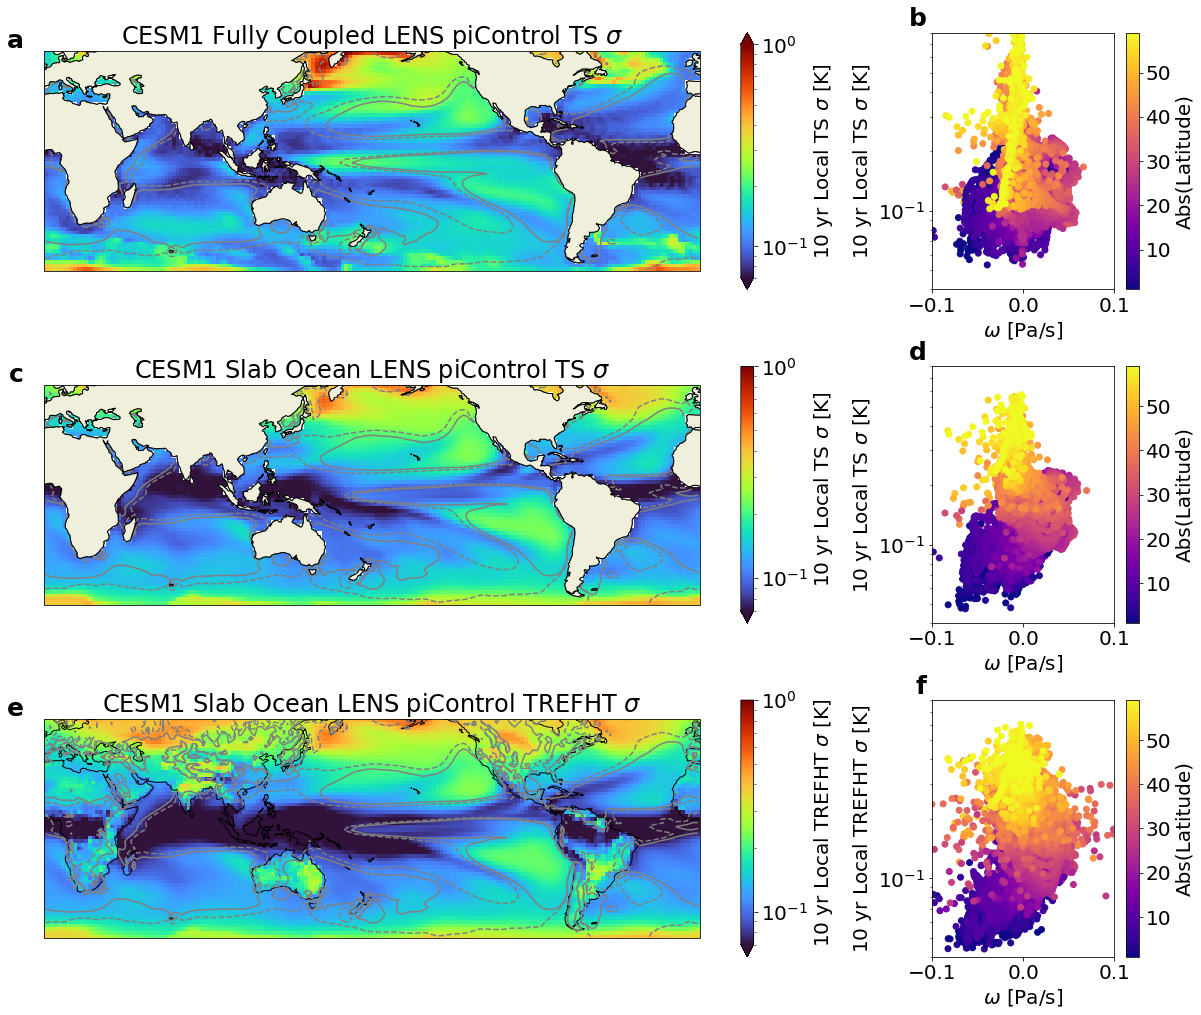

In [21]:
#With contours
fig = plt.figure(figsize=(20, 17))
gs = gridspec.GridSpec(nrows=3, ncols=4)
gs.update(wspace=0.3, hspace=0.3)
#top=300
#bottom=270
font = {'size'   : 20,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

scat_max = 0.8
scat_min = 4*10e-3

colored_lats_B = []
for latitude in OMEGA_B_mask['lat'].values:
    for i in range(179): #length of longitude
       colored_lats_B.append(abs(latitude))
print(len(colored_lats_B))

colored_lats_E = []
for latitude in OMEGA_E_mask['lat'].values:
    for i in range(179): #length of longitude
       colored_lats_E.append(abs(latitude))
print(len(colored_lats_E))

colored_lats_TREFHT = []
for latitude in OMEGA_E_TREFHT['lat'].values:
    for i in range(179): #length of longitude
       colored_lats_TREFHT.append(abs(latitude))
print(len(colored_lats_TREFHT))

ax1 = fig.add_subplot(gs[0,0:3], projection=ccrs.PlateCarree(central_longitude=180))
TS_B_mask.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=7*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TS $\sigma$ [K]'})
ax1.coastlines(color='black', linewidth=1)
OMEGA_B_mask.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax1.text(-0.03, 1.1, 'a', transform=ax1.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'CESM1 Fully Coupled LENS piControl TS $\sigma$')

ax2 = fig.add_subplot(gs[0,3])
scatter_B = ax2.scatter(OMEGA_B_mask, TS_B_mask, c=colored_lats_B, cmap='plasma')
cbar = plt.colorbar(scatter_B, ax=ax2)
cbar.ax.set_ylabel('Abs(Latitude)')
plt.ylim(scat_min, scat_max)
plt.xlim(-0.1,0.1)
plt.yscale('log')
#plt.title('Control - CESM1')
plt.xlabel(r'$\omega$ [Pa/s]')
ax2.text(-0.03, 1.1, 'b', transform=ax2.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
plt.ylabel(r'10 yr Local TS $\sigma$ [K]')

ax3 = fig.add_subplot(gs[1,0:3], projection=ccrs.PlateCarree(central_longitude=180))
TS_E_mask.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=7*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TS $\sigma$ [K]'})
ax3.coastlines(color='black', linewidth=1)
OMEGA_E_mask.plot.contour(ax=ax3, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax3.text(-0.03, 1.1, 'c', transform=ax3.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
ax3.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'CESM1 Slab Ocean LENS piControl TS $\sigma$')

ax4 = fig.add_subplot(gs[1,3])
scatter_E = ax4.scatter(OMEGA_E_mask, TS_E_mask, c=colored_lats_E, cmap='plasma')
cbar = plt.colorbar(scatter_E, ax=ax4)
cbar.ax.set_ylabel('Abs(Latitude)')
plt.ylim(scat_min, scat_max)
plt.xlim(-0.1,0.1)
plt.yscale('log')
#plt.title('Control - CESM1')
plt.xlabel(r'$\omega$ [Pa/s]')
ax4.text(-0.03, 1.1, 'd', transform=ax4.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
plt.ylabel(r'10 yr Local TS $\sigma$ [K]')

ax5 = fig.add_subplot(gs[2,0:3], projection=ccrs.PlateCarree(central_longitude=180))
TREFHT_E_var.plot(ax=ax5, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=7*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TREFHT $\sigma$ [K]'})
ax5.coastlines(color='black', linewidth=1)
OMEGA_E_TREFHT.plot.contour(ax=ax5, transform=ccrs.PlateCarree(), 
                                                     colors='#808080', levels=[-0.005,0.005])
ax5.text(-0.03, 1.1, 'e', transform=ax5.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
plt.title(r'CESM1 Slab Ocean LENS piControl TREFHT $\sigma$')

ax6 = fig.add_subplot(gs[2,3])
scatter_TREFHT = ax6.scatter(OMEGA_E_TREFHT, TREFHT_E_var, c=colored_lats_TREFHT, cmap='plasma')
cbar = plt.colorbar(scatter_TREFHT, ax=ax6)
cbar.ax.set_ylabel('Abs(Latitude)')
plt.ylim(scat_min, scat_max)
plt.xlim(-0.1,0.1)
plt.yscale('log')
#plt.title('Control - CESM1')
plt.xlabel(r'$\omega$ [Pa/s]')
ax6.text(-0.03, 1.1, 'f', transform=ax6.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
plt.ylabel(r'10 yr Local TREFHT $\sigma$ [K]')

In [7]:
def binning(omega,temp_var,mini,maxi,spacing):
    omega_dataset = omega.sel(lat=slice(-30,30)).to_dataset()
        
    bin_edges = np.arange(mini,maxi,spacing)
    print(bin_edges)
    
    
    omega_dataset['temp'] = temp_var.sel(lat=slice(-30,30))
    omega_dataset_stack = omega_dataset.stack(z=('lat','lon'))
    omega_dataset_stack['tags'] = pd.cut(omega_dataset_stack['OMEGA'], bins=bin_edges, labels=bin_edges[:-1])
    omega_dataset_stats = omega_dataset_stack.groupby('tags').groups
    
    var_mean_binned = []
    var_std_binned = []
    for group in omega_dataset_stats:
        var_list = []
        for index in omega_dataset_stats[group]:
            var_list.append(omega_dataset_stack.temp[index].item())
        var_mean_binned.append(np.nanmean(var_list))
        var_std_binned.append(np.nanstd(var_list))

    gkde = stats.gaussian_kde(omega_dataset_stack['OMEGA'][~np.isnan(omega_dataset_stack['OMEGA'])])
    pdf = gkde.evaluate(np.linspace(omega_dataset_stack['OMEGA'].min(), omega_dataset_stack['OMEGA'].max(),200))
    
    return omega_dataset_stack, omega_dataset_stats, var_mean_binned, var_std_binned, pdf

[-8.00000000e-02 -6.00000000e-02 -4.00000000e-02 -2.00000000e-02
  1.38777878e-17  2.00000000e-02  4.00000000e-02  6.00000000e-02]
[-8.00000000e-02 -6.00000000e-02 -4.00000000e-02 -2.00000000e-02
  1.38777878e-17  2.00000000e-02  4.00000000e-02  6.00000000e-02]
[-8.00000000e-02 -6.00000000e-02 -4.00000000e-02 -2.00000000e-02
  1.38777878e-17  2.00000000e-02  4.00000000e-02  6.00000000e-02]
[-8.00000000e-02 -6.00000000e-02 -4.00000000e-02 -2.00000000e-02
  1.38777878e-17  2.00000000e-02  4.00000000e-02  6.00000000e-02]


Text(-0.03, 1.1, 'h')

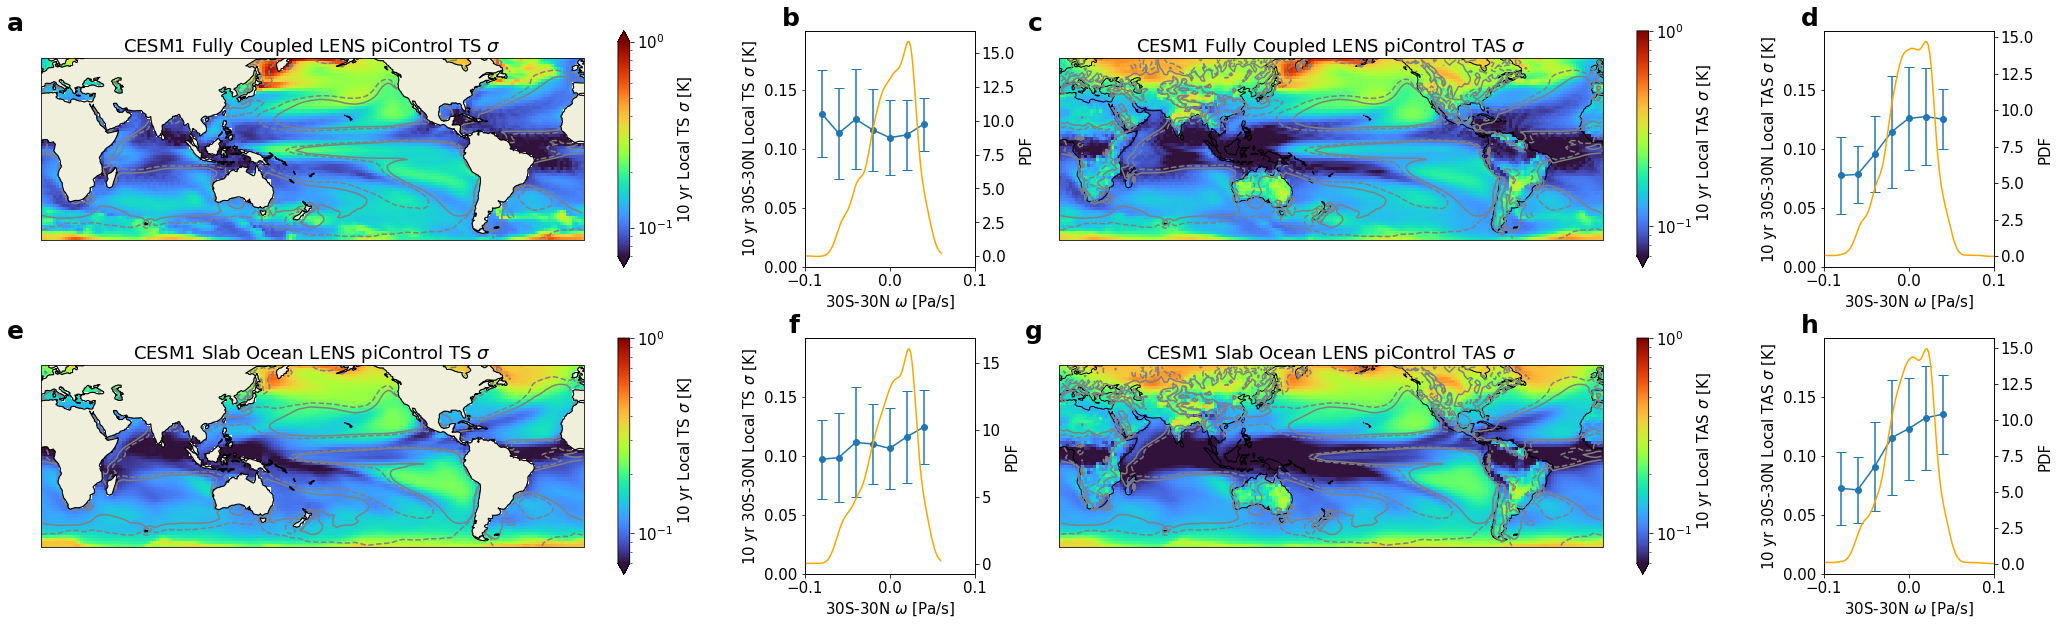

In [23]:
#With contours
fig = plt.figure(figsize=(35, 10))
gs = gridspec.GridSpec(nrows=2, ncols=8)
gs.update(wspace=0.5, hspace=0.3)
#top=300
#bottom=270
font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

scat_max = 0.2
scat_min = 0

ax1 = fig.add_subplot(gs[0,0:3], projection=ccrs.PlateCarree(central_longitude=180))
TS_B_mask.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=7*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TS $\sigma$ [K]'})
ax1.coastlines(color='black', linewidth=1)
OMEGA_B_mask.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax1.text(-0.03, 1.25, 'a', transform=ax1.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'CESM1 Fully Coupled LENS piControl TS $\sigma$')

ax2 = fig.add_subplot(gs[0,3])
ts_stack_B, ts_stats_B, ts_m_B, ts_std_B, ts_pdf_B = binning(OMEGA_B_mask,TS_B_mask,-0.08,0.08,0.02)
ax2.errorbar(ts_stats_B.keys(), ts_m_B, ts_std_B, capsize=5)
ax2.scatter(ts_stats_B.keys(), ts_m_B)
ax2.set_xlabel(r'30S-30N $\omega$ [Pa/s]')
ax2.set_ylabel(r'10 yr 30S-30N Local TS $\sigma$ [K]')
ax2.set_ylim(scat_min, scat_max)
ax2.set_xlim(-0.1,0.1)
ax2.set_yticks([0,0.05,0.1,0.15])
ax2b = ax2.twinx()
ax2b.plot(np.linspace(ts_stack_B['OMEGA'].min(), ts_stack_B['OMEGA'].max(), 200), ts_pdf_B, color='orange')
ax2b.set_ylabel(r'PDF')
#ax2b.set_yticks([0,2.5,5,7.5,10,12.5,15,17.5])
plt.xlabel(r'$\omega$ [Pa/s]')
ax2.text(-0.03, 1.1, 'b', transform=ax2.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')

ax3 = fig.add_subplot(gs[0,4:7], projection=ccrs.PlateCarree(central_longitude=180))
TREFHT_B_var.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=7*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TAS $\sigma$ [K]'})
ax3.coastlines(color='black', linewidth=1)
OMEGA_B_TREFHT.plot.contour(ax=ax3, transform=ccrs.PlateCarree(), 
                                                     colors='#808080', levels=[-0.005,0.005])
ax3.text(-0.03, 1.25, 'c', transform=ax3.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
plt.title(r'CESM1 Fully Coupled LENS piControl TAS $\sigma$')

ax4 = fig.add_subplot(gs[0,7])
trefht_stack_B, trefht_stats_B, trefht_m_B, trefht_std_B, trefht_pdf_B = binning(OMEGA_B_TREFHT,TREFHT_B_var,
                                                                                 -0.08,0.08,0.02)
ax4.errorbar(trefht_stats_B.keys(), trefht_m_B, trefht_std_B, capsize=5)
ax4.scatter(trefht_stats_B.keys(), trefht_m_B)
ax4.set_xlabel(r'30S-30N $\omega$ [Pa/s]')
ax4.set_ylabel(r'10 yr 30S-30N Local TAS $\sigma$ [K]')
ax4.set_ylim(scat_min, scat_max)
ax4.set_yticks([0,0.05,0.1,0.15])
ax4.set_xlim(-0.1,0.1)
ax4b = ax4.twinx()
ax4b.plot(np.linspace(trefht_stack_B['OMEGA'].min(), trefht_stack_B['OMEGA'].max(), 200), trefht_pdf_B, color='orange')
ax4b.set_ylabel(r'PDF')
plt.xlabel(r'$\omega$ [Pa/s]')
ax4.text(-0.03, 1.1, 'd', transform=ax4.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')

ax5 = fig.add_subplot(gs[1,0:3], projection=ccrs.PlateCarree(central_longitude=180))
TS_E_mask.plot(ax=ax5, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=7*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TS $\sigma$ [K]'})
ax5.coastlines(color='black', linewidth=1)
OMEGA_E_mask.plot.contour(ax=ax5, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax5.text(-0.03, 1.25, 'e', transform=ax5.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
ax5.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'CESM1 Slab Ocean LENS piControl TS $\sigma$')

ax6 = fig.add_subplot(gs[1,3])
ts_stack_E, ts_stats_E, ts_m_E, ts_std_E, ts_pdf_E = binning(OMEGA_E_mask,TS_E_mask,-0.08,0.08,0.02)
ax6.errorbar(ts_stats_E.keys(), ts_m_E, ts_std_E, capsize=5)
ax6.scatter(ts_stats_E.keys(), ts_m_E)
ax6.set_xlabel(r'30S-30N $\omega$ [Pa/s]')
ax6.set_ylabel(r'10 yr 30S-30N Local TS $\sigma$ [K]')
ax6.set_ylim(scat_min, scat_max)
ax6.set_xlim(-0.1,0.1)
ax6.set_yticks([0,0.05,0.1,0.15])
ax6b = ax6.twinx()
ax6b.plot(np.linspace(ts_stack_E['OMEGA'].min(), ts_stack_E['OMEGA'].max(), 200), ts_pdf_E, color='orange')
ax6b.set_ylabel(r'PDF')
ax6.text(-0.03, 1.1, 'f', transform=ax6.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')

ax7 = fig.add_subplot(gs[1,4:7], projection=ccrs.PlateCarree(central_longitude=180))
TREFHT_E_var.plot(ax=ax7, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=7*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TAS $\sigma$ [K]'})
ax7.coastlines(color='black', linewidth=1)
OMEGA_E_TREFHT.plot.contour(ax=ax7, transform=ccrs.PlateCarree(), 
                                                     colors='#808080', levels=[-0.005,0.005])
ax7.text(-0.03, 1.25, 'g', transform=ax7.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
plt.title(r'CESM1 Slab Ocean LENS piControl TAS $\sigma$')

ax8 = fig.add_subplot(gs[1,7])
trefht_stack_E, trefht_stats_E, trefht_m_E, trefht_std_E, trefht_pdf_E = binning(OMEGA_E_TREFHT,TREFHT_E_var,
                                                                                 -0.08,0.08,0.02)
ax8.errorbar(trefht_stats_E.keys(), trefht_m_E, trefht_std_E, capsize=5)
ax8.scatter(trefht_stats_E.keys(), trefht_m_E)
ax8.set_xlabel(r'30S-30N $\omega$ [Pa/s]')
ax8.set_ylabel(r'10 yr 30S-30N Local TAS $\sigma$ [K]')
ax8.set_ylim(scat_min, scat_max)
ax8.set_yticks([0,0.05,0.1,0.15])
ax8.set_xlim(-0.1,0.1)
ax8b = ax8.twinx()
ax8b.plot(np.linspace(trefht_stack_E['OMEGA'].min(), trefht_stack_E['OMEGA'].max(), 200), trefht_pdf_E, color='orange')
ax8b.set_ylabel(r'PDF')
plt.xlabel(r'$\omega$ [Pa/s]')
ax8.text(-0.03, 1.1, 'h', transform=ax8.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')

[-8.00000000e-02 -6.00000000e-02 -4.00000000e-02 -2.00000000e-02
  1.38777878e-17  2.00000000e-02  4.00000000e-02  6.00000000e-02]
[-8.00000000e-02 -6.00000000e-02 -4.00000000e-02 -2.00000000e-02
  1.38777878e-17  2.00000000e-02  4.00000000e-02  6.00000000e-02]
[-8.00000000e-02 -6.00000000e-02 -4.00000000e-02 -2.00000000e-02
  1.38777878e-17  2.00000000e-02  4.00000000e-02  6.00000000e-02]
[-8.00000000e-02 -6.00000000e-02 -4.00000000e-02 -2.00000000e-02
  1.38777878e-17  2.00000000e-02  4.00000000e-02  6.00000000e-02]


Text(-0.03, 1.1, 'h')

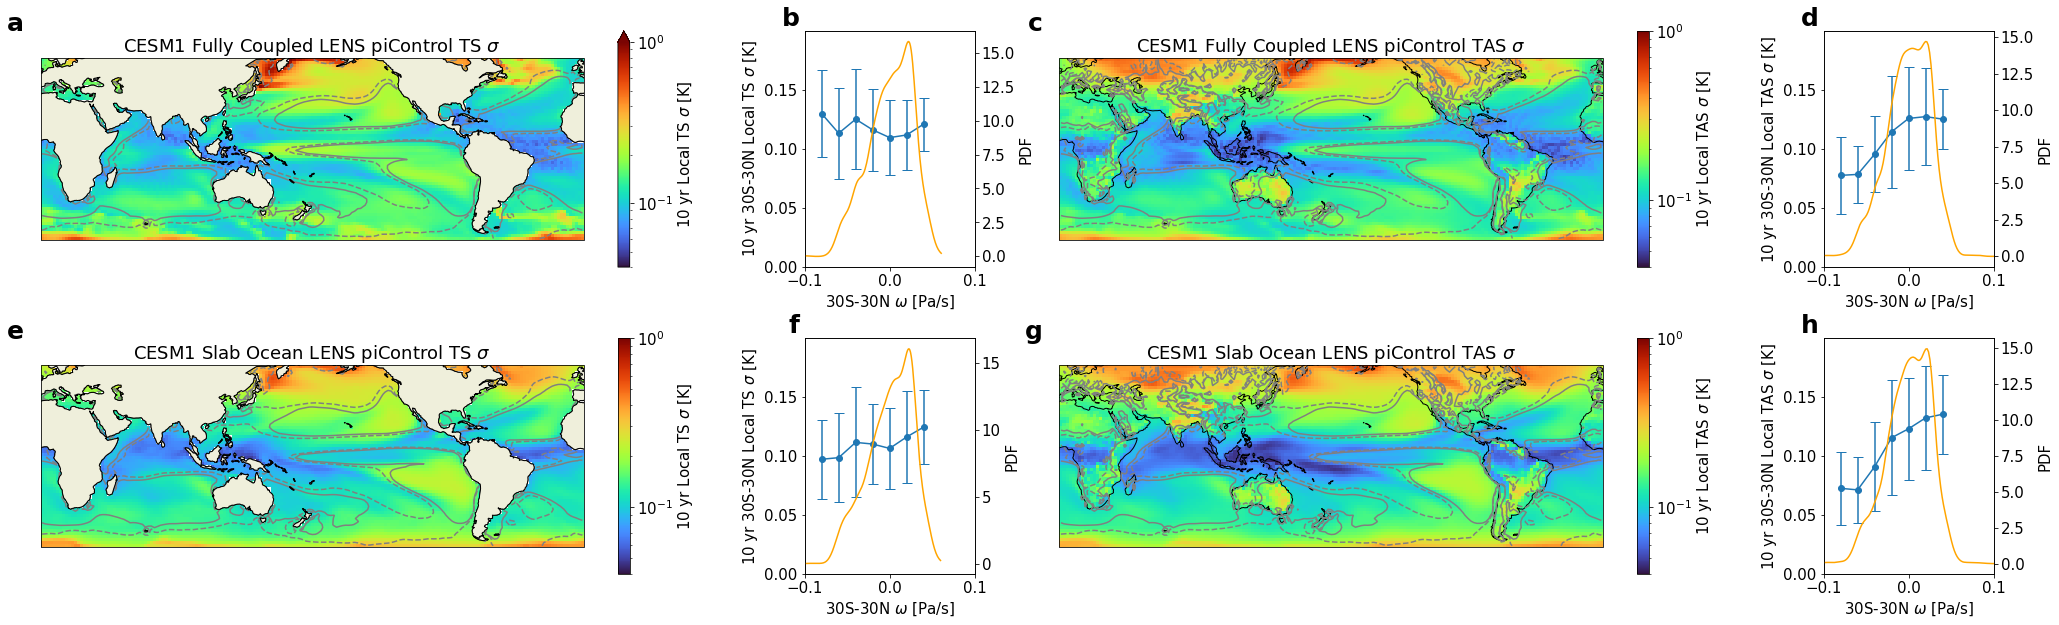

In [8]:
#With contours
fig = plt.figure(figsize=(35, 10))
gs = gridspec.GridSpec(nrows=2, ncols=8)
gs.update(wspace=0.5, hspace=0.3)
#top=300
#bottom=270
font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

scat_max = 0.2
scat_min = 0

ax1 = fig.add_subplot(gs[0,0:3], projection=ccrs.PlateCarree(central_longitude=180))
TS_B_mask.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=4*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TS $\sigma$ [K]'})
ax1.coastlines(color='black', linewidth=1)
OMEGA_B_mask.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax1.text(-0.03, 1.25, 'a', transform=ax1.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'CESM1 Fully Coupled LENS piControl TS $\sigma$')

ax2 = fig.add_subplot(gs[0,3])
ts_stack_B, ts_stats_B, ts_m_B, ts_std_B, ts_pdf_B = binning(OMEGA_B_mask,TS_B_mask,-0.08,0.08,0.02)
ax2.errorbar(ts_stats_B.keys(), ts_m_B, ts_std_B, capsize=5)
ax2.scatter(ts_stats_B.keys(), ts_m_B)
ax2.set_xlabel(r'30S-30N $\omega$ [Pa/s]')
ax2.set_ylabel(r'10 yr 30S-30N Local TS $\sigma$ [K]')
ax2.set_ylim(scat_min, scat_max)
ax2.set_xlim(-0.1,0.1)
ax2.set_yticks([0,0.05,0.1,0.15])
ax2b = ax2.twinx()
ax2b.plot(np.linspace(ts_stack_B['OMEGA'].min(), ts_stack_B['OMEGA'].max(), 200), ts_pdf_B, color='orange')
ax2b.set_ylabel(r'PDF')
#ax2b.set_yticks([0,2.5,5,7.5,10,12.5,15,17.5])
plt.xlabel(r'$\omega$ [Pa/s]')
ax2.text(-0.03, 1.1, 'b', transform=ax2.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')

ax3 = fig.add_subplot(gs[0,4:7], projection=ccrs.PlateCarree(central_longitude=180))
TREFHT_B_var.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=4*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TAS $\sigma$ [K]'})
ax3.coastlines(color='black', linewidth=1)
OMEGA_B_TREFHT.plot.contour(ax=ax3, transform=ccrs.PlateCarree(), 
                                                     colors='#808080', levels=[-0.005,0.005])
ax3.text(-0.03, 1.25, 'c', transform=ax3.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
plt.title(r'CESM1 Fully Coupled LENS piControl TAS $\sigma$')

ax4 = fig.add_subplot(gs[0,7])
trefht_stack_B, trefht_stats_B, trefht_m_B, trefht_std_B, trefht_pdf_B = binning(OMEGA_B_TREFHT,TREFHT_B_var,
                                                                                 -0.08,0.08,0.02)
ax4.errorbar(trefht_stats_B.keys(), trefht_m_B, trefht_std_B, capsize=5)
ax4.scatter(trefht_stats_B.keys(), trefht_m_B)
ax4.set_xlabel(r'30S-30N $\omega$ [Pa/s]')
ax4.set_ylabel(r'10 yr 30S-30N Local TAS $\sigma$ [K]')
ax4.set_ylim(scat_min, scat_max)
ax4.set_yticks([0,0.05,0.1,0.15])
ax4.set_xlim(-0.1,0.1)
ax4b = ax4.twinx()
ax4b.plot(np.linspace(trefht_stack_B['OMEGA'].min(), trefht_stack_B['OMEGA'].max(), 200), trefht_pdf_B, color='orange')
ax4b.set_ylabel(r'PDF')
plt.xlabel(r'$\omega$ [Pa/s]')
ax4.text(-0.03, 1.1, 'd', transform=ax4.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')

ax5 = fig.add_subplot(gs[1,0:3], projection=ccrs.PlateCarree(central_longitude=180))
TS_E_mask.plot(ax=ax5, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=4*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TS $\sigma$ [K]'})
ax5.coastlines(color='black', linewidth=1)
OMEGA_E_mask.plot.contour(ax=ax5, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax5.text(-0.03, 1.25, 'e', transform=ax5.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
ax5.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'CESM1 Slab Ocean LENS piControl TS $\sigma$')

ax6 = fig.add_subplot(gs[1,3])
ts_stack_E, ts_stats_E, ts_m_E, ts_std_E, ts_pdf_E = binning(OMEGA_E_mask,TS_E_mask,-0.08,0.08,0.02)
ax6.errorbar(ts_stats_E.keys(), ts_m_E, ts_std_E, capsize=5)
ax6.scatter(ts_stats_E.keys(), ts_m_E)
ax6.set_xlabel(r'30S-30N $\omega$ [Pa/s]')
ax6.set_ylabel(r'10 yr 30S-30N Local TS $\sigma$ [K]')
ax6.set_ylim(scat_min, scat_max)
ax6.set_xlim(-0.1,0.1)
ax6.set_yticks([0,0.05,0.1,0.15])
ax6b = ax6.twinx()
ax6b.plot(np.linspace(ts_stack_E['OMEGA'].min(), ts_stack_E['OMEGA'].max(), 200), ts_pdf_E, color='orange')
ax6b.set_ylabel(r'PDF')
ax6.text(-0.03, 1.1, 'f', transform=ax6.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')

ax7 = fig.add_subplot(gs[1,4:7], projection=ccrs.PlateCarree(central_longitude=180))
TREFHT_E_var.plot(ax=ax7, transform=ccrs.PlateCarree(), cmap='turbo', 
                           norm=matplotlib.colors.LogNorm(), vmin=4*10e-3, vmax=1, 
                           cbar_kwargs={'label':r'10 yr Local TAS $\sigma$ [K]'})
ax7.coastlines(color='black', linewidth=1)
OMEGA_E_TREFHT.plot.contour(ax=ax7, transform=ccrs.PlateCarree(), 
                                                     colors='#808080', levels=[-0.005,0.005])
ax7.text(-0.03, 1.25, 'g', transform=ax7.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
plt.title(r'CESM1 Slab Ocean LENS piControl TAS $\sigma$')

ax8 = fig.add_subplot(gs[1,7])
trefht_stack_E, trefht_stats_E, trefht_m_E, trefht_std_E, trefht_pdf_E = binning(OMEGA_E_TREFHT,TREFHT_E_var,
                                                                                 -0.08,0.08,0.02)
ax8.errorbar(trefht_stats_E.keys(), trefht_m_E, trefht_std_E, capsize=5)
ax8.scatter(trefht_stats_E.keys(), trefht_m_E)
ax8.set_xlabel(r'30S-30N $\omega$ [Pa/s]')
ax8.set_ylabel(r'10 yr 30S-30N Local TAS $\sigma$ [K]')
ax8.set_ylim(scat_min, scat_max)
ax8.set_yticks([0,0.05,0.1,0.15])
ax8.set_xlim(-0.1,0.1)
ax8b = ax8.twinx()
ax8b.plot(np.linspace(trefht_stack_E['OMEGA'].min(), trefht_stack_E['OMEGA'].max(), 200), trefht_pdf_E, color='orange')
ax8b.set_ylabel(r'PDF')
plt.xlabel(r'$\omega$ [Pa/s]')
ax8.text(-0.03, 1.1, 'h', transform=ax8.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')